In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import rdflib
from rdflib import Graph, Literal, RDF, URIRef
from rdflib.namespace import FOAF, XSD
from rdflib import Graph, URIRef, RDF, FOAF



In [6]:
structured_data = pd.read_csv('customer_transactions.csv')
structured_data.head()

,CustomerID,TransactionAmount,ProductID,Date
0,C001,150.00,P1001,2023-01-05
1,C002,200.50,P1003,2023-01-06
2,C003,99.99,P1002,2023-01-07
3,C004,300.00,P1004,2023-01-08
4,C005,450.75,P1005,2023-01-09


In [10]:
structured_data.describe()

,TransactionAmount
count,25.000000
mean,231.588800
std,148.590378
min,70.000000
25%,99.990000
50%,200.500000
75%,320.000000
max,510.000000


In [7]:
unstructured_data = pd.read_json('customer_reviews.json')
unstructured_data.head()

,CustomerID,ReviewText,Rating
0,C001,Great product quality!,5
1,C002,Satisfied with the purchase.,4
2,C003,Could be better.,3
3,C004,Excellent service and product.,5
4,C005,Not what I expected.,2


In [12]:
# Handling missing values in structured data
structured_data.fillna(method='ffill', inplace=True)
# Basic text preprocessing for unstructured data
unstructured_data['ReviewText'] = unstructured_data['ReviewText'].str.lower()

/tmp/ipykernel_43671/355180541.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  structured_data.fillna(method='ffill', inplace=True)


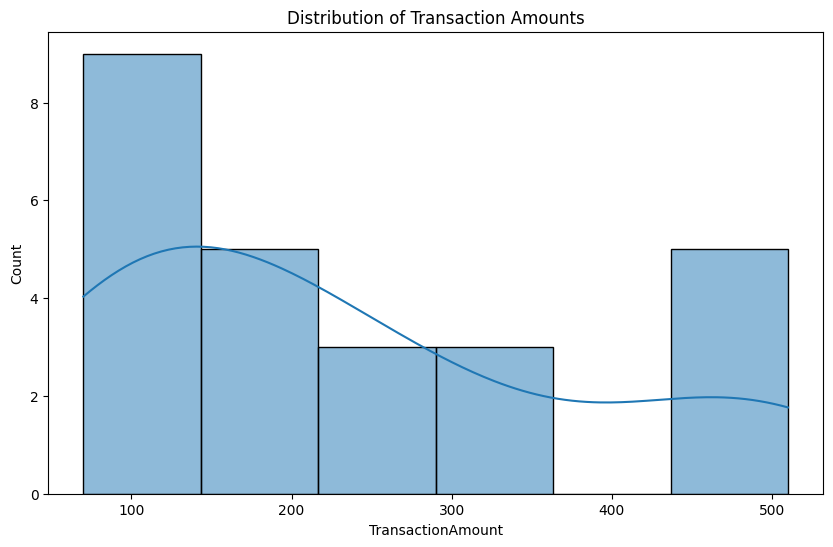

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(structured_data['TransactionAmount'], kde=True)
plt.title('Distribution of Transaction Amounts')
plt.show()

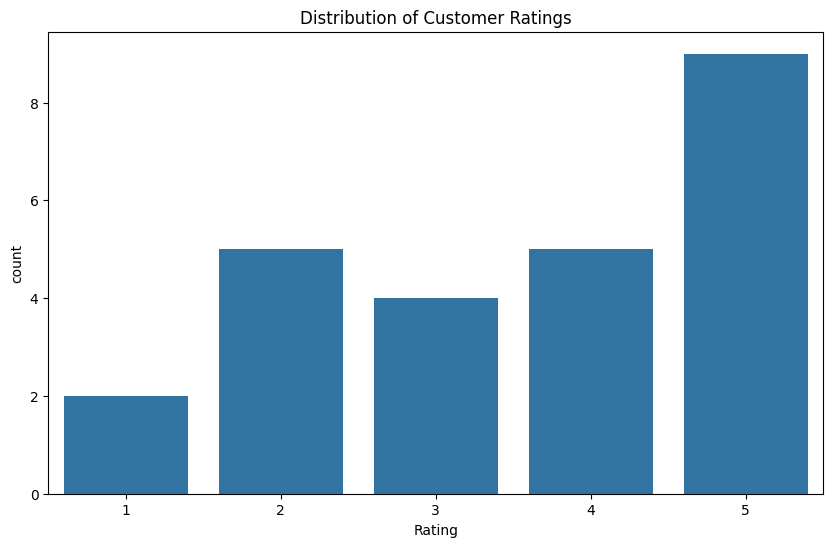

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Rating', data=unstructured_data)
plt.title('Distribution of Customer Ratings')
plt.show()

In [30]:
# Create a basic ontology graph
g = Graph()
# Define a namespace
namespace = URIRef("http://example.org/")

In [31]:
# Add triples to the graph
for _, row in structured_data.iterrows():
    customer = URIRef(namespace + "Customer" + str(row['CustomerID']))
    product = URIRef(namespace + "Product" + str(row['ProductID']))
    g.add((customer, RDF.type, FOAF.Person))
    g.add((product, RDF.type, URIRef(namespace + "Product")))
    g.add((customer, URIRef(namespace + "buys"), product))


In [41]:
# Print the graph in RDF/XML format

print(g.serialize(format='xml'))

<?xml version="1.0" encoding="utf-8"?>
<rdf:RDF
   xmlns:ns1="http://example.org/"
   xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#"
>
  <rdf:Description rdf:about="http://example.org/CustomerC016">
    <rdf:type rdf:resource="http://xmlns.com/foaf/0.1/Person"/>
    <ns1:buys rdf:resource="http://example.org/ProductP1001"/>
  </rdf:Description>
  <rdf:Description rdf:about="http://example.org/CustomerC004">
    <rdf:type rdf:resource="http://xmlns.com/foaf/0.1/Person"/>
    <ns1:buys rdf:resource="http://example.org/ProductP1004"/>
  </rdf:Description>
  <rdf:Description rdf:about="http://example.org/CustomerC013">
    <rdf:type rdf:resource="http://xmlns.com/foaf/0.1/Person"/>
    <ns1:buys rdf:resource="http://example.org/ProductP1002"/>
  </rdf:Description>
  <rdf:Description rdf:about="http://example.org/CustomerC010">
    <rdf:type rdf:resource="http://xmlns.com/foaf/0.1/Person"/>
    <ns1:buys rdf:resource="http://example.org/ProductP1005"/>
  </rdf:Description>
  <rdf:D

In [39]:
# Example: Average transaction amount
avg_transaction = structured_data['TransactionAmount'].mean()
print(f"Average Transaction Amount: {avg_transaction}")

Average Transaction Amount: 231.58879999999996


In [40]:
# Example: Most common rating
most_common_rating = unstructured_data['Rating'].mode()[0]
print(f"Most Common Rating: {most_common_rating}")

Most Common Rating: 5
